In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0

In [2]:
y_train

array([False,  True,  True, ..., False,  True, False])

In [4]:
!pip install tensorflow

     |████████████████████████████████| 175.5 MB 27.4 MB/s eta 0:00:01
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 1.0 MB 3.1 MB/s eta 0:00:01
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
     |████████████████████████████████| 10.6 MB 1.1 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 3.3 MB 1.8 MB/s eta 0:00:01
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Dense = dicht standart layer

In [7]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,))) #28 x 28 = 784 TUPEL! 
model.add(Dense(1, activation="sigmoid")) # true fals array

model.compile(optimizer="sgd", loss="binary_crossentropy") #wichtig um auf einer gpu ausführen zu können

In [8]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=100,
    batch_size=1000)

Epoch 1/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1195
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1175
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1156
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1142
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1130
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1121
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1108
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1098
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1088
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1071
Epoch 12/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1066
Epoch 13/100
60/60 [=================

In [32]:
print(y_train[1])

True


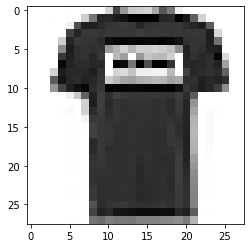

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap="gray_r")
plt.show()

# X_train[1].reshape(1, 784).shape

In [35]:
model.predict(X_train[1].reshape(1, 784))

array([[0.9711908]], dtype=float32)